1. Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Titanic_test.csv to Titanic_test.csv


In [3]:
#Read the data
titanic_data = pd.read_csv("Titanic_test.csv")
titanic_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
titanic_info = titanic_data.info()
titanic_head = titanic_data.head()
titanic_info , titanic_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


(None,
    PassengerId  Pclass                                          Name     Sex  \
 0          892       3                              Kelly, Mr. James    male   
 1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
 2          894       2                     Myles, Mr. Thomas Francis    male   
 3          895       3                              Wirz, Mr. Albert    male   
 4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
 
     Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
 0  34.5      0      0   330911   7.8292   NaN        Q  
 1  47.0      1      0   363272   7.0000   NaN        S  
 2  62.0      0      0   240276   9.6875   NaN        Q  
 3  27.0      0      0   315154   8.6625   NaN        S  
 4  22.0      1      1  3101298  12.2875   NaN        S  )

In [5]:
numerical_summary = titanic_data.describe()
categorical_summary = titanic_data.describe(include= 'object')
numerical_summary, categorical_summary

(       PassengerId      Pclass         Age       SibSp       Parch        Fare
 count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
 mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
 std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
 min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
 25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
 50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
 75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
 max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200,
                     Name   Sex    Ticket            Cabin Embarked
 count                418   418       418               91      418
 unique               418     2       363               76        3
 top     Kelly, Mr. James  male  PC 17608  B57 B59 B63 B66        S
 freq  

In [6]:
plt.style.use("seaborn-darkgrid")

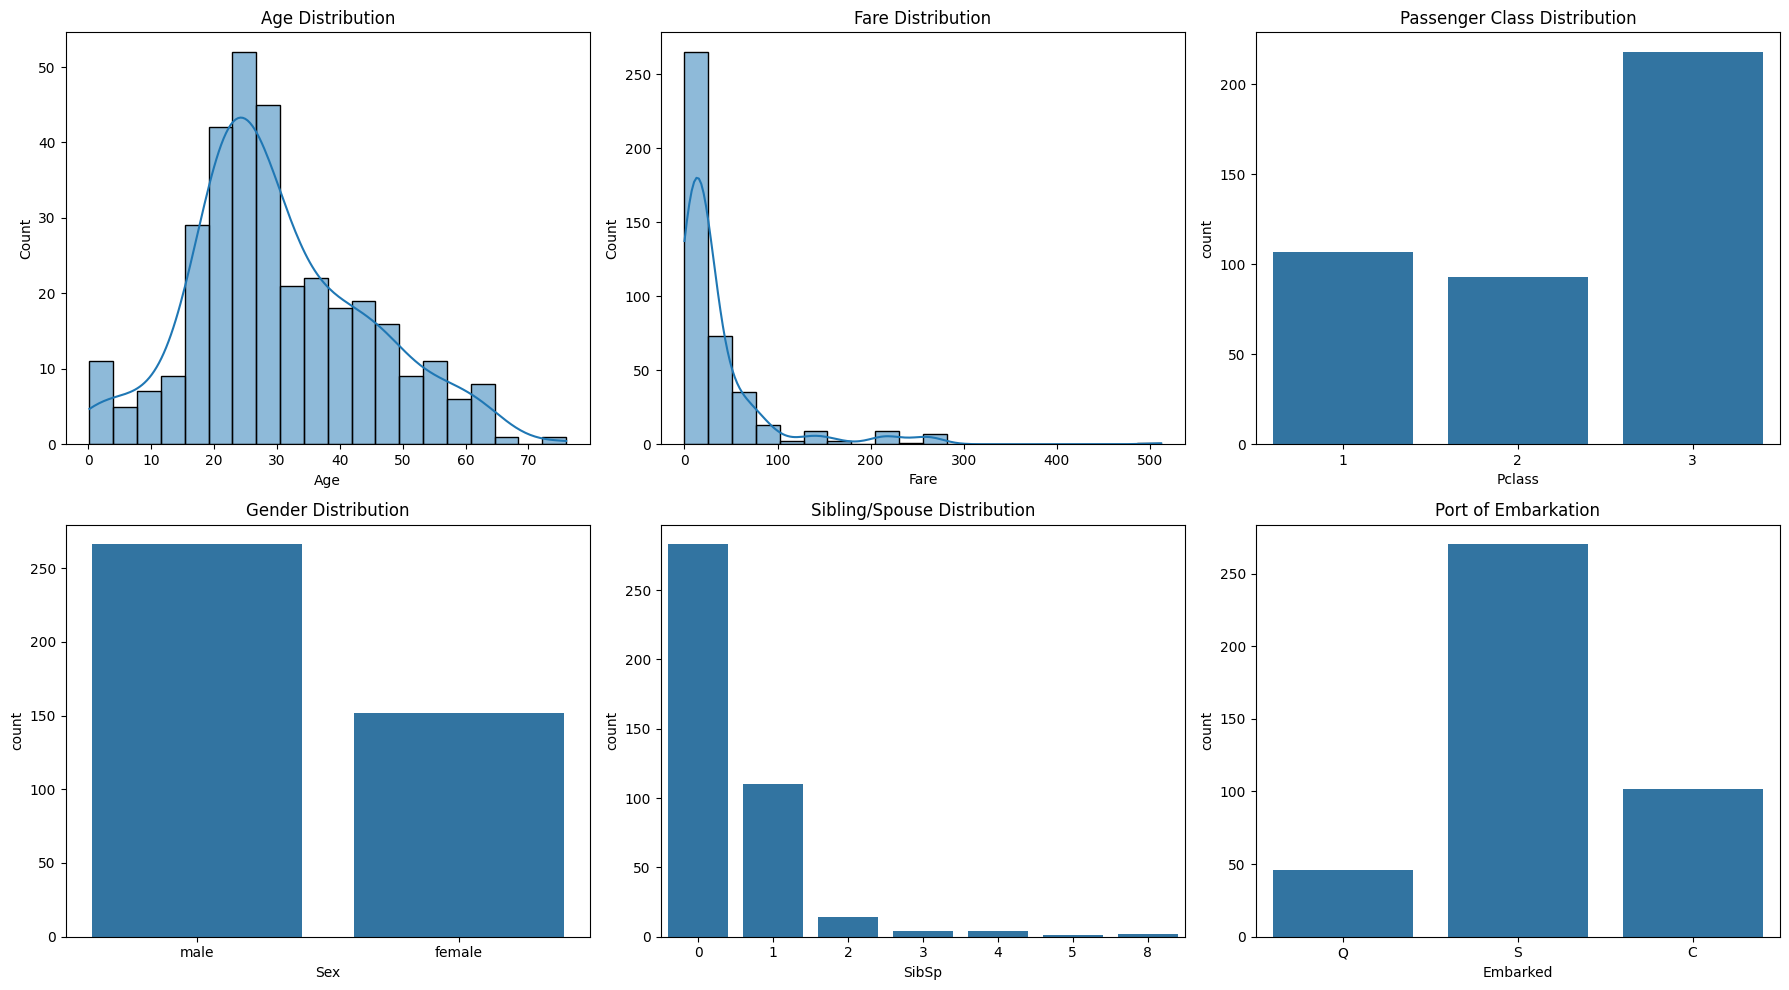

In [ ]:
fig, axs = plt.subplots(2,3,figsize = (18,10))
sns.histplot(titanic_data['Age'], bins=20, kde=True, ax=axs[0, 0]).set_title('Age Distribution')
sns.histplot(titanic_data['Fare'], bins=20, kde=True, ax=axs[0, 1]).set_title('Fare Distribution')
sns.countplot(x='Pclass', data=titanic_data, ax=axs[0, 2]).set_title('Passenger Class Distribution')
sns.countplot(x='Sex', data=titanic_data, ax=axs[1, 0]).set_title('Gender Distribution')
sns.countplot(x='SibSp', data=titanic_data, ax=axs[1, 1]).set_title('Sibling/Spouse Distribution')
sns.countplot(x='Embarked', data=titanic_data, ax=axs[1, 2]).set_title('Port of Embarkation')
plt.tight_layout()
plt.show()

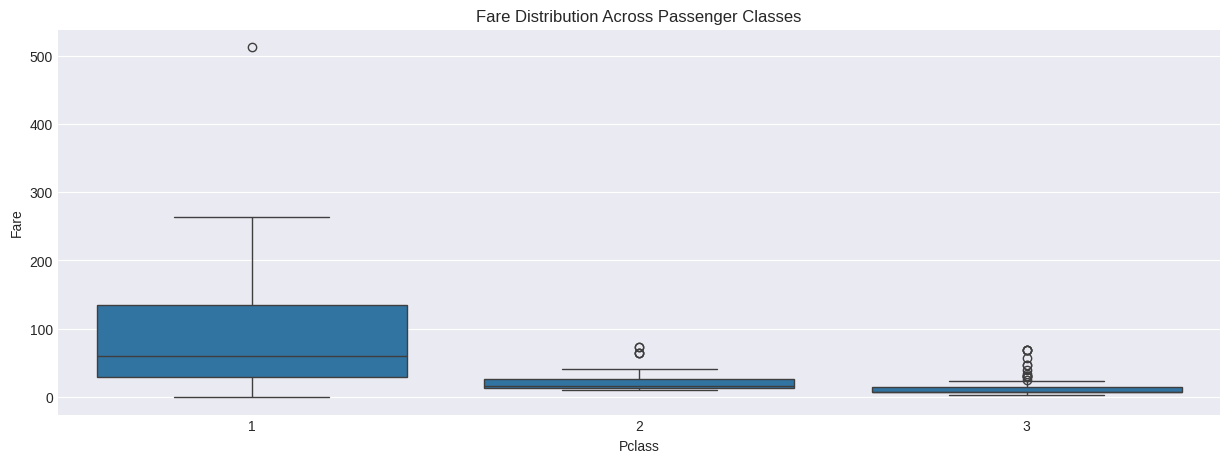

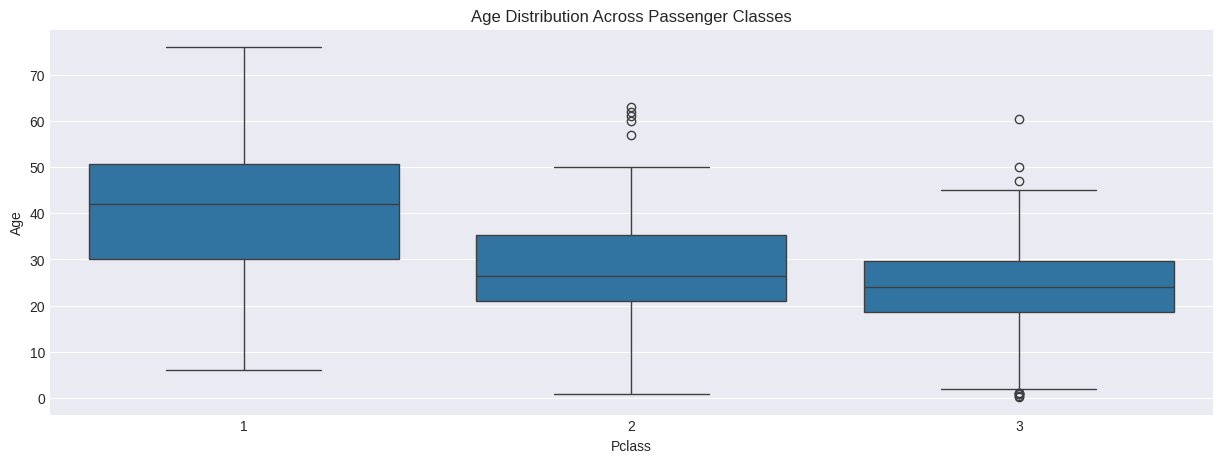

In [7]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='Pclass', y='Fare', data = titanic_data).set_title("Fare Distribution Across Passenger Classes")
plt.show()
plt.figure(figsize=(15, 5))
sns.boxplot(x='Pclass', y='Age', data=titanic_data).set_title('Age Distribution Across Passenger Classes')
plt.show()

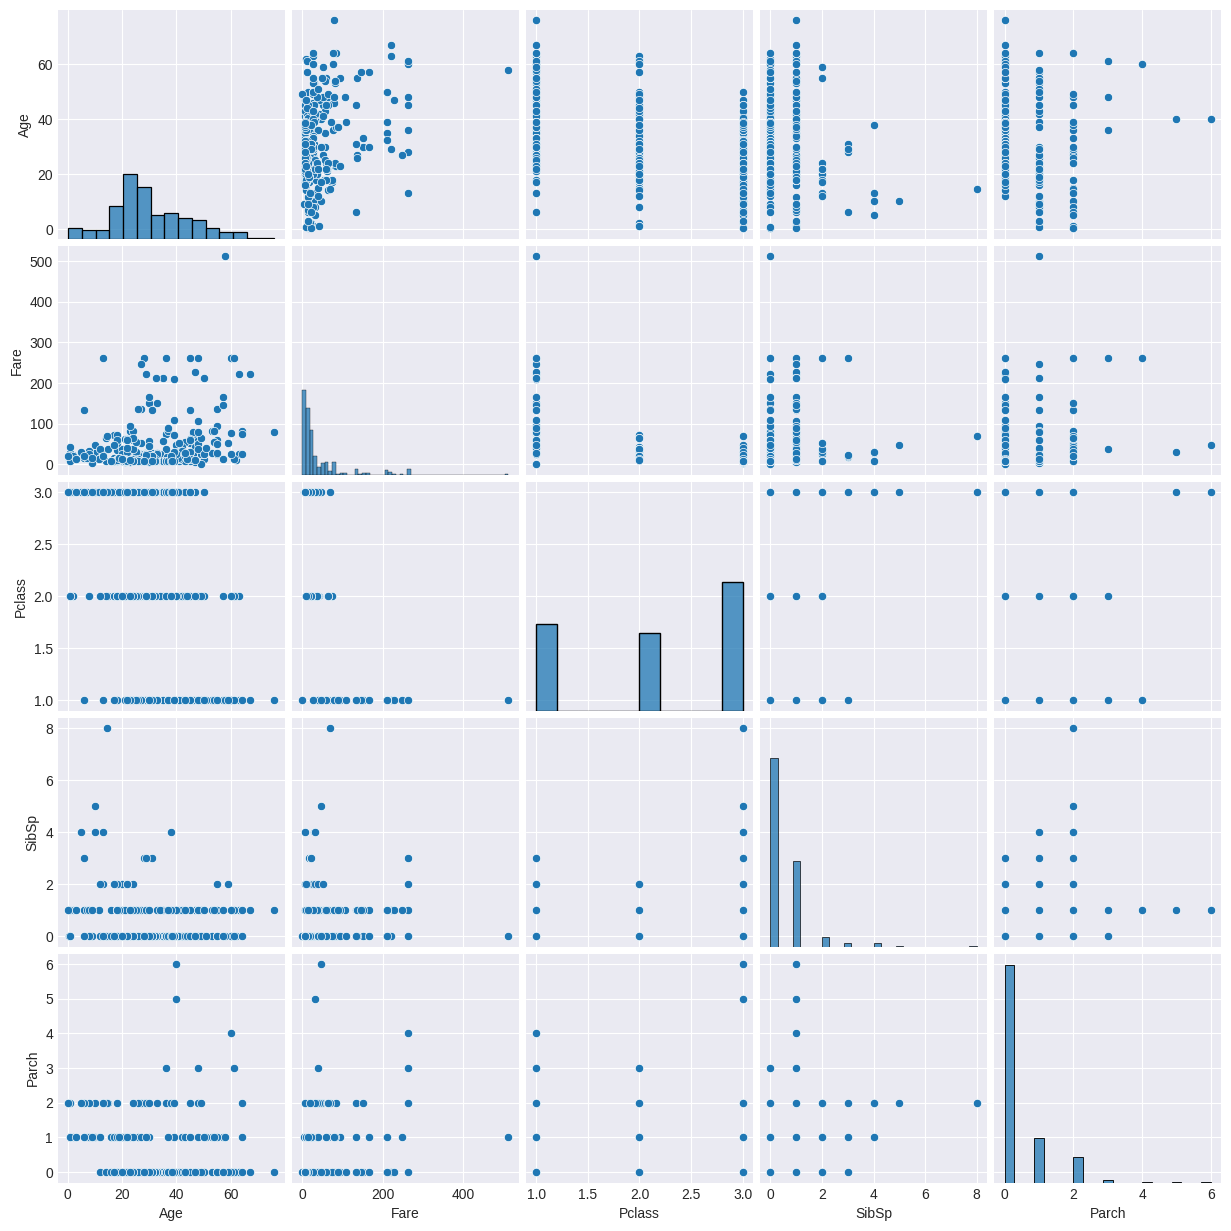

In [8]:
sns.pairplot(titanic_data[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']].dropna())
plt.show()

In [11]:
correlation_matrix = titanic_data[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']].corr()
correlation_matrix

,Age,Fare,Pclass,SibSp,Parch
Age,1.000000,0.337932,-0.492143,-0.091587,-0.061249
Fare,0.337932,1.000000,-0.577147,0.171539,0.230046
Pclass,-0.492143,-0.577147,1.000000,0.001087,0.018721
SibSp,-0.091587,0.171539,0.001087,1.000000,0.306895
Parch,-0.061249,0.230046,0.018721,0.306895,1.000000


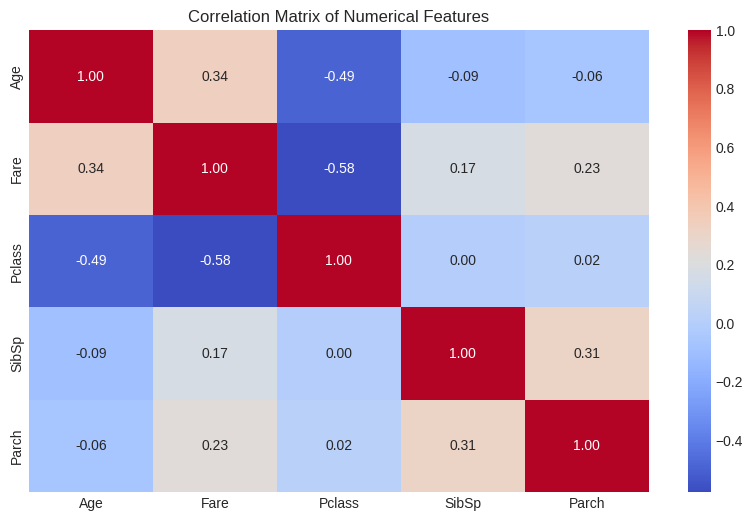

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

2.Data Processing

In [12]:
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)
titanic_data['Cabin'].fillna('Unknown', inplace=True)
titanic_data.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


In [13]:
titanic_encoded = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)
titanic_encoded.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,Unknown,True,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,Unknown,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,Unknown,True,True,False
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,Unknown,True,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,Unknown,False,False,True


3. Model Building



In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [57]:
from google.colab import files
uploaded=files.upload()

Saving Titanic_train.csv to Titanic_train (2).csv


In [58]:
titanic_data = pd.read_csv("Titanic_train.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
one_hot_encoder = OneHotEncoder()
embarked_encoded = one_hot_encoder.fit_transform(X[['Embarked']]).toarray()
X = pd.concat([X, pd.DataFrame(embarked_encoded, columns=one_hot_encoder.get_feature_names_out(['Embarked']))], axis=1)
X.drop(['Embarked'], axis=1, inplace=True)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [62]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [63]:
y_pred = model.predict(X_test)

In [64]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.8044692737430168


4.Model Evaluation

In [85]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
fpr, tpr, thresholds

(array([0.        , 0.01904762, 0.02857143, 0.02857143, 0.02857143,
        0.02857143, 0.02857143, 0.02857143, 0.02857143, 0.03809524,
        0.03809524, 0.03809524, 0.03809524, 0.03809524, 0.04761905,
        0.04761905, 0.04761905, 0.04761905, 0.06666667, 0.06666667,
        0.07619048, 0.08571429, 0.08571429, 0.0952381 , 0.11428571,
        0.11428571, 0.13333333, 0.13333333, 0.16190476, 0.16190476,
        0.17142857, 0.17142857, 0.18095238, 0.18095238, 0.2       ,
        0.2       , 0.21904762, 0.23809524, 0.24761905, 0.24761905,
        0.24761905, 0.25714286, 0.25714286, 0.28571429, 0.31428571,
        0.35238095, 0.35238095, 0.36190476, 0.41904762, 0.42857143,
        0.43809524, 0.45714286, 0.46666667, 0.47619048, 0.48571429,
        0.4952381 , 0.52380952, 0.54285714, 0.56190476, 0.59047619,
        0.60952381, 0.60952381, 0.63809524, 0.65714286, 0.66666667,
        0.6952381 , 0.7047619 , 0.72380952, 0.77142857, 0.79047619,
        0.84761905, 1.        ]),
 array([0.    

In [86]:
roc_auc = roc_auc_score(y_test, y_prob)
roc_auc

0.8907335907335906

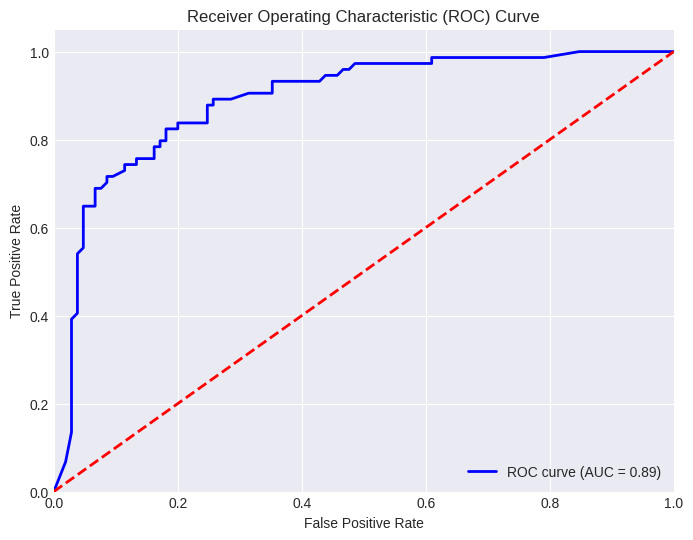

In [83]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

5. Interpretation:


In [87]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [90]:
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f'Feature {i}' for i in range(X_train.shape[1])]
feature_names

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [91]:
coefficients = model.coef_[0]
coefficients

array([-0.81362241, -2.49606312, -0.0252256 , -0.2449909 , -0.12230175,
        0.00322775,  1.23170896,  0.68281223,  0.6415797 ])

In [94]:
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient (log-odds)': coefficients,
    'Odds Ratio': np.exp(coefficients)
})
coef_df

,Feature,Coefficient (log-odds),Odds Ratio
0,Pclass,-0.813622,0.443250
1,Sex,-2.496063,0.082409
2,Age,-0.025226,0.975090
3,SibSp,-0.244991,0.782712
4,Parch,-0.122302,0.884881
5,Fare,0.003228,1.003233
6,Embarked_C,1.231709,3.427081
7,Embarked_Q,0.682812,1.979437
8,Embarked_S,0.641580,1.899479


In [96]:
import statsmodels.api as sm

In [98]:
X_train = sm.add_constant(X_train)
X_train

,const,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
331,1.0,1,1,45.5,0,0,28.5000,0.0,0.0,1.0
733,1.0,2,1,23.0,0,0,13.0000,0.0,0.0,1.0
382,1.0,3,1,32.0,0,0,7.9250,0.0,0.0,1.0
704,1.0,3,1,26.0,1,0,7.8542,0.0,0.0,1.0
813,1.0,3,0,6.0,4,2,31.2750,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
106,1.0,3,0,21.0,0,0,7.6500,0.0,0.0,1.0
270,1.0,1,1,28.0,0,0,31.0000,0.0,0.0,1.0
860,1.0,3,1,41.0,2,0,14.1083,0.0,0.0,1.0
435,1.0,1,0,14.0,1,2,120.0000,0.0,0.0,1.0


In [99]:
model = sm.Logit(y_train, X_train)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.448180
         Iterations 7


In [100]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      703
Method:                           MLE   Df Model:                            8
Date:                Wed, 09 Oct 2024   Pseudo R-squ.:                  0.3233
Time:                        04:44:42   Log-Likelihood:                -319.10
converged:                       True   LL-Null:                       -471.54
Covariance Type:            nonrobust   LLR p-value:                 3.779e-61
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4222   7.11e+06   4.81e-07      1.000   -1.39e+07    1.39e+07
Pclass        -0.9729      0.157     -6.190      0.000      -1.281      -0.665
Sex           -2.7245      0.222    -12.277      0.0

In [101]:
p_values = result.pvalues
odds_ratios = np.exp(result.params)

In [104]:
summary_df = pd.DataFrame({
    'Coefficient': result.params,
    'P-value': p_values,
    'Odds Ratio': odds_ratios
})

In [103]:
print(summary_df)

            Coefficient       P-value  Odds Ratio
const          3.422177  9.999996e-01   30.636049
Pclass        -0.972900  6.013769e-10    0.377985
Sex           -2.724524  1.201361e-34    0.065577
Age           -0.031284  2.943154e-04    0.969200
SibSp         -0.304552  7.845588e-03    0.737454
Parch         -0.125973  3.559293e-01    0.881639
Fare           0.002365  3.532880e-01    1.002368
Embarked_C     1.343031  9.999998e-01    3.830636
Embarked_Q     1.172914  9.999999e-01    3.231394
Embarked_S     0.906233  9.999999e-01    2.474982
